# <font color=darkcyan>  Expectation Maximization for latent data models </font>

In the case where we are interested in estimating unknown parameters $\theta\in\mathbb{R}^m$ characterizing a model with missing data, the Expectation Maximization (EM) algorithm (Dempster et al. 1977) can be used when the joint distribution of the missing data $X$ and the observed data $Y$ is explicit. For all $\theta\in\mathbb{R}^m$, let $p_{\theta}$ be the probability density function of $(X,Y)$ when the model is parameterized by $\theta$ with respect to a given reference measure $\mu$. The EM algorithm aims at computing iteratively an approximation of the maximum likelihood estimator which maximizes the observed data loglikelihood:

$$
\ell(\theta;Y) = \log p_{\theta}(Y) =\log \int p_{\theta}(x,Y)\mu(\mathrm{d}x)\,.
$$

As this quantity cannot be computed explicitly in general cases, the EM algorithm finds the maximum likelihood estimator by iteratively maximizing the expected complete data loglikelihood.
 
Start with an inital value $\theta^{(0)}$ and let $\theta^{(t)}$ be the estimate at the $t$-th iteration for $t\geqslant 0$, then the next iteration of EM is decomposed into two steps.

1. E-step. Compute the expectation of the complete data loglikelihood, with respect to the conditional distribution of the missing data given the observed data parameterized by $\theta^{(t)}$:

$$
Q(\theta,\theta^{(t)}) =\mathbb{E}_{\theta^{(t)}}\left[\log p_{\theta}(X,Y)|Y \right]\,.
$$

2. M step. Determine $\theta^{(t+1)}$ by maximizing the function Q:

$$
\theta^{(t+1)}\in argmax_\theta Q(\theta,\theta^{(t)})\,.
$$


#### Question 1 
Prove the following crucial property motivates the EM algorithm.  
For all $\theta,\theta^{(t)}$,
    
$$
\ell(Y;\theta) - \ell(Y;\theta^{(t)}) \geqslant Q(\theta,\theta^{(t)})-Q(\theta^{(t)},\theta^{(t)})\,.
$$

On montre facilement que :

$$
Q(\theta,\theta^{(t)})  = \ell(Y;\theta) + \mathbb{E}_{\theta^{(t)}}[\log p_{\theta}(X|Y)]\,.
$$

On note donc,

$$
\ell(Y;\theta) - \ell(Y;\theta^{(t)}) = Q(\theta,\theta^{(t)})-Q(\theta^{(t)},\theta^{(t)}) - H(\theta,\theta^{(t)}) + H(\theta^{(t)},\theta^{(t)})\,,
$$

avec

$$
H(\theta,\theta^{(t)}) = \mathbb{E}_{\theta^{(t)}}[\log p_{\theta}(X|Y)]\,.
$$

On retrouve la formule en constatant que

$$
H(\theta,\theta^{(t)}) - H(\theta^{(t)},\theta^{(t)})\leqslant 0\,,
$$

In the following, $X = (X_1,\ldots,X_n)$ and $Y = (Y_1,\ldots,Y_n)$ where $\{(X_i,Y_i)\}_{1\leqslant i\leqslant n}$  are i.i.d. in $\{-1,1\} \times \mathbb{R}^d$. For $k\in\{-1,1\}$, write $\pi_k = \mathbb{P}(X_1 = k)$. Assume that, conditionally on the event $\{X_1 = k\}$, $Y_1$ has a Gaussian distribution with mean $\mu_k \in\mathbb{R}^d$ and covariance matrix $\Sigma\in \mathbb{R}^{d\times d}$. In this case, the parameter $\theta=(\pi_1, \mu_1,\mu_{-1}, \Sigma)$ belongs to the set $\Theta= [0,1] \times \mathbb{R}^d \times \mathbb{R}^d \times \mathbb{R}^{d \times d}$.

#### Question 2
- Write the complete data loglikelihood
- Let $\theta^{(t)}$ be the current parameter estimate. Compute $\theta\mapsto Q(\theta,\theta^{(t)})$.
- Compute $\theta^{(t+1)} = \mathrm{argmax}_\theta Q(\theta,\theta^{(t)})$. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

#### <font color=darkorange>  Simulated data</font>

#### Question 3
- Sample data from a mixture of two Gaussian distributions and display the associated histogram

In [19]:
# number of observations
n_samples = 1000

# means and variance to be estimated
mu1, sigma1 = -2, 1.5
mu2, sigma2 = 3, 1
mu = np.array([mu1, mu2])
sigma = np.array([sigma1, sigma2])

# prior probability of the first cluster/goup 
pi1 = 0.3

# A compléter
X = np.random.normal(0, 1, n_samples)
loi = np.random.choice(2, size=n_samples, p=[pi1, 1-pi1])
mix_gauss = mu[loi] + np.sqrt(sigma[loi])*X

In [15]:
def Gaussian_pdf(x, mean, variance):
  z = np.exp(-(x - mean)**2/(2*variance))/np.sqrt(2*np.pi*variance)
  return z

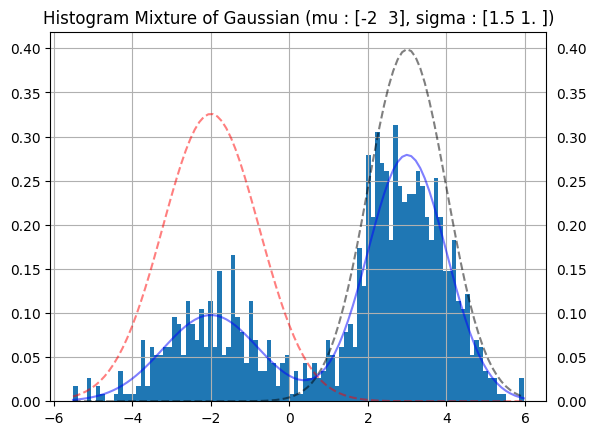

In [20]:
# visualize the training data

# A compléter
fig, ax = plt.subplots()
count, bins, ignored = plt.hist(mix_gauss, 100, density=True)

# pour affichage plus joli des courbes
plt.plot(bins, Gaussian_pdf(bins, mu1, sigma1), linestyle = 'dashed', alpha = 0.5, color='red', label="True 1st density")
plt.plot(bins, Gaussian_pdf(bins, mu2, sigma2), linestyle = 'dashed', alpha = 0.5, color='k', label="True 2nd density")
plt.plot(bins, pi1*Gaussian_pdf(bins, mu1, sigma1) + (1-pi1)*Gaussian_pdf(bins, mu2, sigma2), alpha = 0.5, color='b', label="True mixture density")

plt.tick_params(labelright=True)
plt.title(f'Histogram Mixture of Gaussian (mu : {mu}, sigma : {sigma})')
plt.grid(True)

#### <font color=darkorange>  EM algorithm</font>

In [21]:
# plot estimated density - plot the density of a mixture of two Gaussian distributions

# A compléter
def plot_pdf(mix_gauss, pi1, mu1, mu2, sigma1, sigma2, w, means, variances, it):
    plt.figure(figsize=(10,8))
    
    # Affichage de l'estimation séparée des densitées
    plt.subplot(1,2,1)
    plt.xlabel("$x$")
    plt.ylabel("probability density")
    plt.title("Iteration {}".format(it))

    plt.plot(bins, Gaussian_pdf(bins, mu1, sigma1), alpha = 0.8, color='red', label="True 1st density")
    plt.plot(bins, Gaussian_pdf(bins, mu2, sigma2), alpha = 0.8, color='k', label="True 2nd density")

    plt.plot(bins, Gaussian_pdf(bins, means[0], variances[0]), linestyle = 'dashed', alpha = 0.5, color='red', label="Estimated 1st density")
    plt.plot(bins, Gaussian_pdf(bins, means[1], variances[1]), linestyle = 'dashed', alpha = 0.5, color='k', label="Estimated 2nd density")
    
    plt.tick_params(labelright=True)
    plt.grid('True')
    plt.legend()
    
    # Affichage de l'estimation de la mixture
    plt.subplot(1,2,2)
    plt.xlabel("$x$")
    plt.ylabel("probability density")
    plt.title("Iteration {}".format(it))
    
    plt.plot(bins, pi1*Gaussian_pdf(bins, mu1, sigma1) + (1-pi1)*Gaussian_pdf(bins, mu2, sigma2), alpha = 0.5, color='b', label="True mixture density")
    plt.plot(bins, w*Gaussian_pdf(bins, means[0], variances[0]) + (1-w)*Gaussian_pdf(bins, means[1], variances[1]), linestyle = 'dashed', alpha = 0.5, color='b', label="Estimated mixture density")
    plt.tick_params(labelright=True)
    plt.grid('True')
    plt.legend()
    plt.tight_layout()
    

#### Question 5
 - Compute $\omega_t^i = \mathbb{P}_{\theta^{(t)}}(X_i=1|Y_i)$.
 - Write the loop of the EM algorithm.
 - Run the algorithm and display the loglikelihood and the estimates along iterations.


Write, for all $1\leqslant i\leqslant n$,

$$
\omega_t^i = \mathbb{P}_{\theta^{(t)}}(X_i=1|Y_i) = \frac{\hat\pi^{(t)}_1 g^{(t)}_1(Y_i)}{\hat\pi^{(t)}_1 g^{(t)}_1(Y_i) + (1-\hat\pi^{(t)}_1) g^{(t)}_{-1}(Y_i)}\,,
$$

where, for $j\in\{-1,1\}$, $g^{(t)}_j$ is the likelihood (density) of the observation $Y$ given the event $\{X=j\}$ when the model is parameterized by $\theta^{(t)}$ (Gaussian distribution with mean $\mu_{j}^{(t)}$ and variance $\Sigma$):

$$
g^{(t)}_j: y \mapsto  \mathrm{det}(2\pi\Sigma^{(t)})^{-1/2}\times\mathrm{exp}\left\{-(y-\mu_j^{(t)})^T(\Sigma^{(t)})^{-1}(y-\mu_j^{(t)})/2\right\}\,.
$$

In [23]:
n_clust = 2
weights = np.ones((n_clust)) / n_clust
means = [0, 1]
variances = [0.5, 2]

In [24]:
# number of iterations of the EM algorithm
n_it = 100

In [25]:
pi1_est = np.zeros(n_it+1)
mu1_est = np.zeros(n_it+1)
mu2_est = np.zeros(n_it+1)
sigma1_est = np.zeros(n_it+1)
sigma2_est = np.zeros(n_it+1)

pi1_est[0] = weights[0]
mu1_est[0] = means[0]
mu2_est[0] = means[1]
sigma1_est[0] = variances[0]
sigma2_est[0] = variances[1]

In [ ]:
# A compléter

In [ ]:
# plot loglikelihood along iterations

In [ ]:
# plot parameters along iterations

#### Question 6

- Explore the sensitivity of the algorithm with respect to i) the initial estimates, ii) the number of iterations, iii) the number of observations and iv) the number of clusters. 

In [1]:
# A compléter